In [10]:
import pandas as pd
import numpy as np
import GetPoolData
import ResetStrategy
import ActiveStrategyFramework
import itertools
import matplotlib.pyplot as plt

# Create config.py in this directory and enter your own Bitquery API Token
from config import BITQUERY_API_TOKEN

#################
#
# Download data
#
################

# Get Swap Data
DOWNLOAD_DATA      = False
address            = '0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8'
token_0_address    = '0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48'
token_1_address    = '0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2'
flipside_queries   = ['https://api.flipsidecrypto.com/api/v2/queries/b8ad3087-803a-478b-9ed3-c4f3c096bc47/data/latest',
                      'https://api.flipsidecrypto.com/api/v2/queries/de277680-5ff6-4d58-bfff-29ef114215be/data/latest']

AGGREGATED_MINUTES = 60*24*3 # Works like a 'target' rebalance period

# Price data for these must be month ends
price_data_begin         = '2020-12-31'
price_data_end           = '2021-12-31'
file_name                = 'eth_usdc'

swap_data                = GetPoolData.get_pool_data_flipside(address,flipside_queries,file_name,DOWNLOAD_DATA)  
price_data               = GetPoolData.get_price_data_bitquery(token_0_address,token_1_address,price_data_begin,price_data_end,BITQUERY_API_TOKEN,file_name,DOWNLOAD_DATA)

# Use empirical CDF for extracting boundaries of strategy
model_data               = ActiveStrategyFramework.aggregate_price_data(price_data,AGGREGATED_MINUTES)

In [29]:
swap_data.dtypes

amount0                       float64
amount1                       float64
id                             object
tick                           object
timestamp                      object
tick_swap                       int32
VIRTUAL_LIQUIDITY_ADJUSTED    float64
tick_pool                       int64
token_in                       object
dtype: object

In [30]:
swap_data.isna()

,amount0,amount1,id,tick,timestamp,tick_swap,VIRTUAL_LIQUIDITY_ADJUSTED,tick_pool,token_in
time_pd,,,,,,,,,
2021-05-05 01:56:23+00:00,False,False,False,False,False,False,False,False,False
2021-05-05 08:23:26+00:00,False,False,False,False,False,False,False,False,False
2021-05-05 09:50:51+00:00,False,False,False,False,False,False,False,False,False
2021-05-05 11:59:57+00:00,False,False,False,False,False,False,False,False,False
2021-05-05 12:56:56+00:00,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2021-08-21 05:16:20+00:00,False,False,False,False,False,False,False,False,False
2021-08-21 05:16:45+00:00,False,False,False,False,False,False,False,False,False
2021-08-21 05:17:22+00:00,False,False,False,False,False,False,False,False,False


In [31]:
price_data.dtypes

time             datetime64[ns]
baseCurrency             object
quoteCurrency            object
quoteAmount             float64
baseAmount              float64
quotePrice              float64
dtype: object

In [32]:
price_data.isna()

,time,baseCurrency,quoteCurrency,quoteAmount,baseAmount,quotePrice
time_pd,,,,,,
2020-12-31 00:01:00+00:00,False,False,False,False,False,False
2020-12-31 00:02:00+00:00,False,False,False,False,False,False
2020-12-31 00:03:00+00:00,False,False,False,False,False,False
2020-12-31 00:04:00+00:00,False,False,False,False,False,False
2020-12-31 00:05:00+00:00,False,False,False,False,False,False
...,...,...,...,...,...,...
2021-08-21 05:26:00+00:00,False,False,False,False,False,False
2021-08-21 05:27:00+00:00,False,False,False,False,False,False
2021-08-21 05:28:00+00:00,False,False,False,False,False,False


                                         time baseCurrency quoteCurrency  \
time_pd                                                                    
2020-12-31 00:01:00+00:00 2020-12-31 00:01:00         USDC          WETH   
2020-12-31 00:02:00+00:00 2020-12-31 00:02:00         USDC          WETH   
2020-12-31 00:03:00+00:00 2020-12-31 00:03:00         USDC          WETH   
2020-12-31 00:04:00+00:00 2020-12-31 00:04:00         USDC          WETH   
2020-12-31 00:05:00+00:00 2020-12-31 00:05:00         USDC          WETH   
...                                       ...          ...           ...   
2021-08-21 05:26:00+00:00 2021-08-21 05:26:00         USDC          WETH   
2021-08-21 05:27:00+00:00 2021-08-21 05:27:00         USDC          WETH   
2021-08-21 05:28:00+00:00 2021-08-21 05:28:00         USDC          WETH   
2021-08-21 05:29:00+00:00 2021-08-21 05:29:00         USDC          WETH   
2021-08-21 05:30:00+00:00 2021-08-21 05:30:00         USDC          WETH   

           

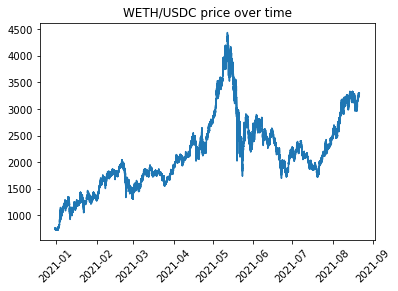

,quoteAmount,baseAmount,quotePrice
count,3.316540e+05,3.316540e+05,331654.000000
mean,9.936507e+01,2.228872e+05,0.000519
std,2.387830e+02,5.799483e+05,0.000186
min,1.672497e-07,6.380000e-04,0.000225
25%,8.953806e+00,1.766837e+04,0.000396
50%,2.831466e+01,5.632837e+04,0.000479
75%,9.268037e+01,1.893852e+05,0.000584
max,1.403870e+04,4.321833e+07,0.001395


In [35]:
print(price_data)
plt.plot(price_data.index,1/price_data['quotePrice'])
plt.title('WETH/USDC price over time')
plt.xticks(rotation = 45)
plt.show()

price_data.describe()

                                 amount0       amount1  \
time_pd                                                  
2021-05-05 01:56:23+00:00      -0.329608  1.000000e-04   
2021-05-05 08:23:26+00:00    -164.694492  5.000000e-02   
2021-05-05 09:50:51+00:00      -0.329169  1.000000e-04   
2021-05-05 11:59:57+00:00       0.000002 -3.291690e-13   
2021-05-05 12:56:56+00:00    1559.137299 -4.678809e-01   
...                                  ...           ...   
2021-08-21 05:16:20+00:00   20000.000000 -6.065000e+00   
2021-08-21 05:16:45+00:00  138068.781354 -4.186414e+01   
2021-08-21 05:17:22+00:00  305422.992845 -9.257564e+01   
2021-08-21 05:17:22+00:00  290984.299459 -8.815776e+01   
2021-08-21 05:18:18+00:00   20000.000000 -6.057796e+00   

                                                                          id  \
time_pd                                                                        
2021-05-05 01:56:23+00:00  0xce7c3c307d820785caa12938012372fc9366a614a6aa...   
2021-

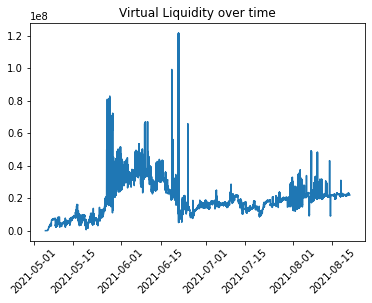

In [16]:
print(swap_data)
plt.plot(swap_data.index, swap_data['VIRTUAL_LIQUIDITY_ADJUSTED'])
plt.title('Virtual Liquidity over time')
plt.xticks(rotation = 45)
plt.show()